In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from rice_ml.unsupervised_learning import DBSCAN

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (6, 5)

df = pd.read_csv("../data/lesions_processed.csv")
df.head()

features = ["x_norm", "y_norm", "slice_norm", "r_xy"]
X = df[features].values
y_true = df["tampered"].values


In [4]:
#standardize
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_std[X_std == 0] = 1

X_scaled = (X - X_mean) / X_std


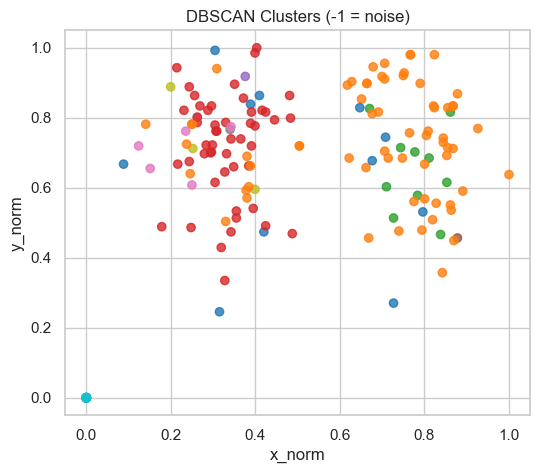

In [6]:
#dbscan
db = DBSCAN(eps=0.8, min_samples=5)
labels = db.fit_predict(X_scaled)

np.unique(labels, return_counts=True)

#plot
plt.scatter(
    df["x_norm"],
    df["y_norm"],
    c=labels,
    cmap="tab10",
    alpha=0.8
)
plt.xlabel("x_norm")
plt.ylabel("y_norm")
plt.title("DBSCAN Clusters (-1 = noise)")
plt.show()



DBSCAN does not assume a fixed number of clusters and can identify outliers, making it more appropriate for irregular lesion distributions

In [7]:
#compare true labels
out = df.copy()
out["dbscan_cluster"] = labels

pd.crosstab(out["dbscan_cluster"], out["tampered"], normalize="index")


tampered,0,1
dbscan_cluster,,
-1,0.090909,0.909091
0,0.384615,0.615385
1,0.000000,1.000000
2,0.140000,0.860000
3,0.000000,1.000000
4,0.000000,1.000000
5,0.333333,0.666667
6,0.000000,1.000000
7,0.000000,1.000000


In [8]:
#bias check
pd.crosstab(
    [out["experiment"], out["tampered"]],
    out["dbscan_cluster"],
    normalize="index"
)


dbscan_cluster             -1         0         1         2         3  \
experiment tampered                                                     
1          0         0.000000  0.447368  0.000000  0.131579  0.000000   
           1         0.105263  0.315789  0.105263  0.378947  0.010526   
2          0         0.055556  0.444444  0.000000  0.111111  0.000000   
           1         0.000000  0.555556  0.000000  0.388889  0.000000   

dbscan_cluster              4         5         6         7         8  
experiment tampered                                                    
1          0         0.000000  0.026316  0.000000  0.000000  0.394737  
           1         0.010526  0.031579  0.010526  0.031579  0.000000  
2          0         0.000000  0.055556  0.000000  0.000000  0.333333  
           1         0.000000  0.055556  0.000000  0.000000  0.000000